In [710]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb, lightgbm as lgbm, catboost as catb
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint
from itertools import permutations, combinations
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Загурзка данных

In [711]:
train = pd.read_csv('./cource_project_data/course_project_train.csv')
test = pd.read_csv('./cource_project_data/course_project_test.csv')
all_data = train.append(test)

### Обзор датасета

In [712]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

In [713]:
train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [714]:
train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


### Обработка выбросов и пропусков

#### Home Ownership

In [715]:
# провреям есть ли пропуски
all_data['Home Ownership'].count() != all_data.shape[0]

False

In [716]:
pd.get_dummies(all_data['Home Ownership']).sum()

Have Mortgage      19
Home Mortgage    4862
Own Home          895
Rent             4224
dtype: int64

#### Annual Income

In [717]:
all_data['Annual Income'].count() != all_data.shape[0]

True

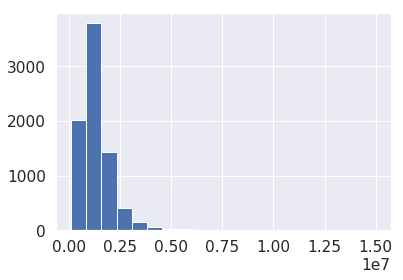

In [718]:
all_data['Annual Income'].hist(bins=20)

In [719]:
all_data['Annual Income'].mode()

0    1206348.0
1    1328803.0
dtype: float64

In [720]:
all_data['Annual Income'].mean()

1366524.5098360656

In [721]:
train['Annual Income'].fillna(all_data['Annual Income'].mode()[1], inplace=True)
test['Annual Income'].fillna(all_data['Annual Income'].mode()[1], inplace=True)

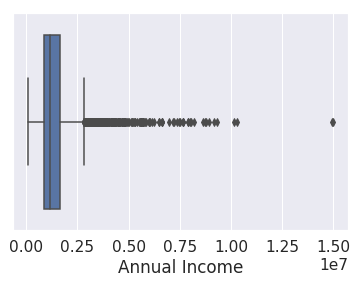

In [722]:
sns.boxplot(all_data['Annual Income'])

In [723]:
all_data['Annual Income'].describe()

count    7.930000e+03
mean     1.366525e+06
std      8.638276e+05
min      1.065330e+05
25%      8.459892e+05
50%      1.168814e+06
75%      1.638693e+06
max      1.497561e+07
Name: Annual Income, dtype: float64

In [724]:
all_data.loc[all_data['Annual Income'] > 1e7]

,Annual Income,Bankruptcies,Credit Default,Credit Score,Current Credit Balance,Current Loan Amount,Home Ownership,Maximum Open Credit,Monthly Debt,Months since last delinquent,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History
6472,10149344.0,0.0,0.0,692.0,205713.0,664818.0,Rent,270380.0,61235.0,22.0,0.0,10.0,debt consolidation,0.0,Short Term,5 years,17.5
36,14934114.0,0.0,NaN,746.0,57722.0,99770.0,Home Mortgage,177298.0,7218.0,NaN,0.0,7.0,other,0.0,Short Term,7 years,15.4
194,14975610.0,0.0,NaN,738.0,103968.0,133386.0,Rent,155518.0,3369.0,NaN,0.0,5.0,major purchase,0.0,Long Term,5 years,44.3
1089,10275770.0,0.0,NaN,746.0,115900.0,608432.0,Home Mortgage,1242538.0,79038.0,NaN,0.0,18.0,debt consolidation,0.0,Long Term,6 years,15.6


In [725]:
train.loc[train['Annual Income'] > 1e7, 'Annual Income'] = train.loc[train['Annual Income'] > 1e7, 'Annual Income'] / 10
test.loc[test['Annual Income'] > 1e7, 'Annual Income'] = test.loc[test['Annual Income'] > 1e7, 'Annual Income'] / 10

#### Years in current job

In [726]:
all_data['Years in current job'].count() != all_data.shape[0]

True

In [727]:
train['Years in current job'].fillna(all_data['Years in current job'].mode()[0], inplace=True)
test['Years in current job'].fillna(all_data['Years in current job'].mode()[0], inplace=True)

In [728]:
all_data['Years in current job'].value_counts()

10+ years    3142
2 years       917
3 years       848
< 1 year      770
5 years       685
1 year        657
4 years       621
6 years       563
7 years       536
8 years       446
9 years       358
Name: Years in current job, dtype: int64

#### Tax Liens

In [729]:
all_data['Tax Liens'].count() != all_data.shape[0]

False

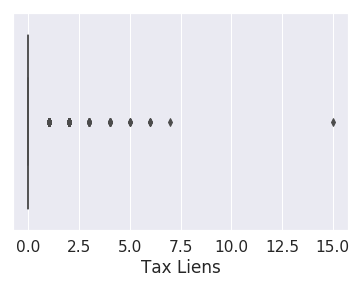

In [730]:
sns.boxplot(all_data['Tax Liens'])

In [731]:
all_data['Tax Liens'].describe()

count    10000.000000
mean         0.031400
std          0.304341
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Tax Liens, dtype: float64

In [732]:
all_data['Tax Liens'].value_counts()

0.0     9811
1.0      128
2.0       35
3.0       11
4.0        7
5.0        3
6.0        3
15.0       1
7.0        1
Name: Tax Liens, dtype: int64

In [733]:
train.loc[train['Tax Liens'] > 3, 'Tax Liens'] = all_data['Tax Liens'].median()
test.loc[test['Tax Liens'] > 3, 'Tax Liens'] = all_data['Tax Liens'].median()

#### Number of Open Accounts

In [734]:
all_data['Number of Open Accounts'].count() != all_data.shape[0]

False

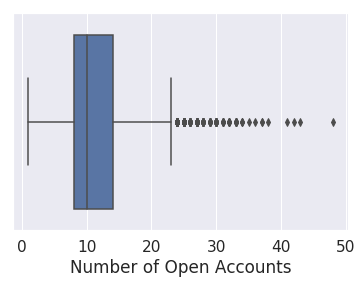

In [735]:
sns.boxplot(all_data['Number of Open Accounts'])

In [736]:
all_data['Number of Open Accounts'].describe()

count    10000.00000
mean        11.14430
std          4.89476
min          1.00000
25%          8.00000
50%         10.00000
75%         14.00000
max         48.00000
Name: Number of Open Accounts, dtype: float64

In [737]:
train.loc[train['Number of Open Accounts'] > 30, 'Number of Open Accounts'] = all_data['Number of Open Accounts'].median()
test.loc[test['Number of Open Accounts'] > 30, 'Number of Open Accounts'] = all_data['Number of Open Accounts'].median()

#### Years of Credit History

In [738]:
all_data['Years of Credit History'].count() != all_data.shape[0]

False

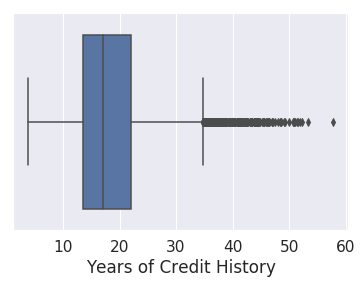

In [739]:
sns.boxplot(all_data['Years of Credit History'])

In [740]:
all_data['Years of Credit History'].describe()

count    10000.000000
mean        18.319580
std          7.095357
min          3.900000
25%         13.500000
50%         17.000000
75%         22.000000
max         57.700000
Name: Years of Credit History, dtype: float64

In [741]:
train.loc[train['Years of Credit History'] > 50, 'Years of Credit History'] = all_data['Years of Credit History'].median()
test.loc[test['Years of Credit History'] > 50, 'Years of Credit History'] = all_data['Years of Credit History'].median()

#### Maximum Open Credit

In [742]:
all_data['Maximum Open Credit'].count() != all_data.shape[0]

False

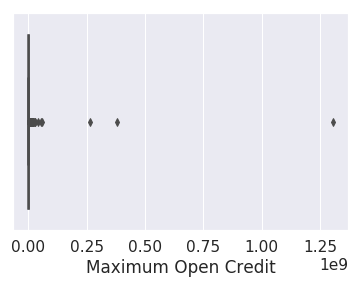

In [743]:
sns.boxplot(all_data['Maximum Open Credit'])

In [744]:
all_data['Maximum Open Credit'].describe()

count    1.000000e+04
mean     8.865079e+05
std      1.389982e+07
min      0.000000e+00
25%      2.788115e+05
50%      4.781810e+05
75%      7.943595e+05
max      1.304726e+09
Name: Maximum Open Credit, dtype: float64

In [745]:
# считаем, что 0 - не валидное значение, т.к. минимальное значение Years of Credit History не 0
all_data.loc[ ((all_data["Maximum Open Credit"] > 1e8) | (all_data["Maximum Open Credit"] == 0)), "Maximum Open Credit"].count()

82

In [746]:
all_data.loc[ (all_data["Maximum Open Credit"] > 1e8)]

,Annual Income,Bankruptcies,Credit Default,Credit Score,Current Credit Balance,Current Loan Amount,Home Ownership,Maximum Open Credit,Monthly Debt,Months since last delinquent,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History
44,1334256.0,0.0,0.0,729.0,656450.0,33110.0,Have Mortgage,3.800523e+08,34357.0,35.0,1.0,17.0,take a trip,0.0,Short Term,10+ years,15.4
617,NaN,0.0,0.0,NaN,1126814.0,529892.0,Home Mortgage,1.304726e+09,5492.0,NaN,0.0,13.0,debt consolidation,0.0,Short Term,3 years,27.5
2617,3217802.0,0.0,0.0,750.0,1834450.0,50116.0,Home Mortgage,2.655129e+08,20272.0,NaN,0.0,12.0,other,0.0,Short Term,10+ years,35.5


In [747]:
train.loc[(train["Maximum Open Credit"] > 1e8) | (train["Maximum Open Credit"] == 0), "Maximum Open Credit"] = all_data["Maximum Open Credit"].median()
test.loc[(test["Maximum Open Credit"] > 1e8) | (test["Maximum Open Credit"] == 0), "Maximum Open Credit"] = all_data["Maximum Open Credit"].median()

#### Number of Credit Problems

In [748]:
all_data['Number of Credit Problems'].count() != all_data.shape[0]

False

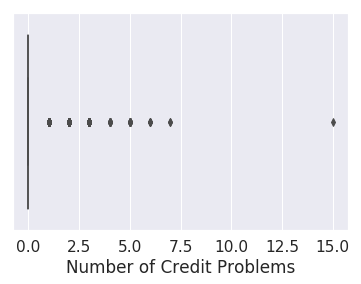

In [749]:
sns.boxplot(all_data['Number of Credit Problems'])

In [750]:
all_data['Number of Credit Problems'].value_counts()

0.0     8646
1.0     1162
2.0      122
3.0       42
5.0       11
4.0       10
6.0        4
7.0        2
15.0       1
Name: Number of Credit Problems, dtype: int64

In [751]:
all_data.loc[all_data['Number of Credit Problems'] > 4]

,Annual Income,Bankruptcies,Credit Default,Credit Score,Current Credit Balance,Current Loan Amount,Home Ownership,Maximum Open Credit,Monthly Debt,Months since last delinquent,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History
1129,1691019.0,2.0,0.0,693.0,116014.0,543906.0,Rent,681934.0,38753.0,71.0,6.0,11.0,major purchase,4.0,Long Term,5 years,20.4
1214,3061584.0,0.0,0.0,740.0,352640.0,99999999.0,Rent,949564.0,29595.0,67.0,6.0,14.0,debt consolidation,6.0,Short Term,2 years,28.9
2716,2522611.0,1.0,0.0,711.0,110257.0,342650.0,Home Mortgage,235994.0,14610.0,56.0,6.0,7.0,business loan,5.0,Short Term,10+ years,14.4
3028,NaN,1.0,1.0,NaN,230318.0,312444.0,Rent,344102.0,17334.0,81.0,5.0,11.0,debt consolidation,4.0,Short Term,NaN,25.0
3435,1231561.0,0.0,1.0,708.0,163571.0,345708.0,Rent,518892.0,17242.0,71.0,5.0,9.0,other,5.0,Long Term,10+ years,16.0
3572,2272761.0,0.0,0.0,606.0,112138.0,156288.0,Own Home,178596.0,27652.0,31.0,5.0,12.0,vacation,0.0,Long Term,5 years,21.5
3814,1254513.0,0.0,1.0,716.0,31920.0,193864.0,Rent,122804.0,1965.0,36.0,5.0,5.0,debt consolidation,4.0,Short Term,1 year,10.5
4624,NaN,0.0,1.0,NaN,81149.0,754446.0,Home Mortgage,228624.0,17732.0,8.0,5.0,9.0,debt consolidation,0.0,Short Term,3 years,27.0
4774,1268896.0,1.0,0.0,739.0,939892.0,268356.0,Own Home,3278000.0,14698.0,18.0,5.0,15.0,debt consolidation,4.0,Short Term,NaN,15.8
5373,1711881.0,0.0,0.0,741.0,295602.0,313654.0,Own Home,551166.0,36092.0,26.0,6.0,12.0,debt consolidation,6.0,Short Term,10+ years,15.4


In [752]:
train.loc[train['Number of Credit Problems'] == 15, 'Number of Credit Problems'] = all_data['Years of Credit History'].median()
test.loc[test['Number of Credit Problems'] == 15, 'Number of Credit Problems'] = all_data['Years of Credit History'].median()

#### Months since last delinquent

In [753]:
all_data['Months since last delinquent'].count() != all_data.shape[0]

True

In [754]:
all_data['Months since last delinquent'].mode()

0    14.0
dtype: float64

In [755]:
all_data['Months since last delinquent'].value_counts()

14.0     104
16.0      91
33.0      90
29.0      90
13.0      90
12.0      87
19.0      86
6.0       85
24.0      85
8.0       83
7.0       82
9.0       81
10.0      80
26.0      78
38.0      76
18.0      75
20.0      75
22.0      74
35.0      72
17.0      71
11.0      70
30.0      70
25.0      70
40.0      70
23.0      70
34.0      67
15.0      67
45.0      66
31.0      66
21.0      66
        ... 
70.0      37
60.0      37
58.0      36
52.0      36
74.0      36
1.0       34
2.0       34
67.0      33
65.0      33
56.0      33
75.0      32
69.0      32
73.0      32
66.0      31
64.0      31
72.0      30
62.0      30
76.0      29
51.0      28
79.0      27
77.0      27
0.0       26
81.0      24
82.0       7
83.0       3
91.0       1
92.0       1
118.0      1
84.0       1
86.0       1
Name: Months since last delinquent, Length: 89, dtype: int64

In [756]:
train['Months since last delinquent'].fillna(all_data['Months since last delinquent'].median(), inplace=True)
test['Months since last delinquent'].fillna(all_data['Months since last delinquent'].median(), inplace=True)

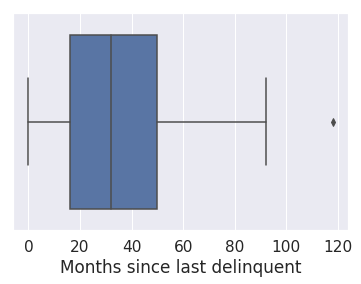

In [757]:
sns.boxplot(all_data['Months since last delinquent'])

#### Bankruptcies

In [758]:
all_data['Bankruptcies'].count() != all_data.shape[0]

True

In [759]:
all_data['Bankruptcies'].mode()

0    0.0
dtype: float64

In [760]:
all_data['Bankruptcies'].median()

0.0

In [761]:
train['Bankruptcies'].fillna(all_data['Bankruptcies'].median(), inplace=True)
test['Bankruptcies'].fillna(all_data['Bankruptcies'].median(), inplace=True)

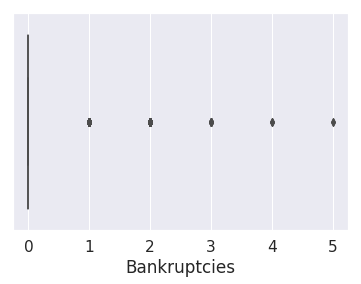

In [762]:
sns.boxplot(all_data['Bankruptcies'])

#### Purpose

In [763]:
all_data['Purpose'].count() != all_data.shape[0]

False

#### Term

In [764]:
all_data['Term'].count() != all_data.shape[0]

False

#### Current Loan Amount

In [765]:
all_data['Current Loan Amount'].count() != all_data.shape[0]

False

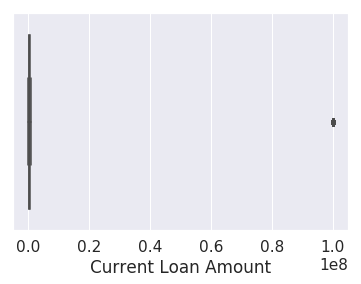

In [766]:
sns.boxplot(all_data['Current Loan Amount'])

In [767]:
all_data['Current Loan Amount'].describe()

count    1.000000e+04
mean     1.194381e+07
std      3.200878e+07
min      1.124200e+04
25%      1.805485e+05
50%      3.117180e+05
75%      5.210700e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

#### Current Credit Balance

In [768]:
all_data['Current Credit Balance'].count() != all_data.shape[0]

False

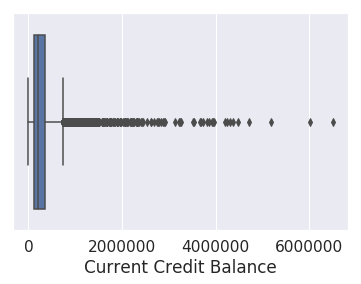

In [769]:
sns.boxplot(all_data['Current Credit Balance'])

In [770]:
all_data['Current Credit Balance'].describe()

count    1.000000e+04
mean     2.914741e+05
std      3.339979e+05
min      0.000000e+00
25%      1.132258e+05
50%      2.090190e+05
75%      3.619500e+05
max      6.506797e+06
Name: Current Credit Balance, dtype: float64

In [771]:
train.loc[train['Current Credit Balance'] == 5e6, 'Current Credit Balance'] = all_data['Current Credit Balance'].median()
test.loc[test['Current Credit Balance'] == 5e6, 'Current Credit Balance'] = all_data['Current Credit Balance'].median()

#### Monthly Debt

In [772]:
all_data['Monthly Debt'].count() != all_data.shape[0]

False

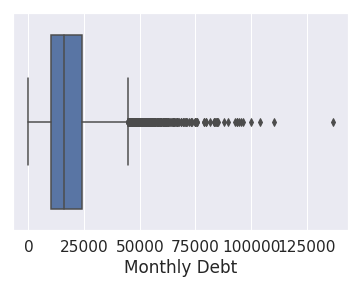

In [773]:
sns.boxplot(all_data['Monthly Debt'])

In [774]:
all_data['Monthly Debt'].describe()

count     10000.000000
mean      18303.675600
std       11831.647516
min           0.000000
25%       10059.750000
50%       16200.000000
75%       23888.250000
max      136679.000000
Name: Monthly Debt, dtype: float64

In [775]:
train.loc[train['Monthly Debt'] == 1e5, 'Monthly Debt'] = all_data['Monthly Debt'].median()
test.loc[test['Monthly Debt'] == 1e5, 'Monthly Debt'] = all_data['Monthly Debt'].median()

#### Credit Score

In [776]:
all_data['Credit Score'].count() != all_data.shape[0]

True

In [777]:
all_data['Credit Score'].median() 

731.0

In [778]:
all_data['Credit Score'].mode() 

0    740.0
dtype: float64

In [779]:
train['Credit Score'].fillna(all_data['Credit Score'].median(), inplace=True)
test['Credit Score'].fillna(all_data['Credit Score'].median(), inplace=True)

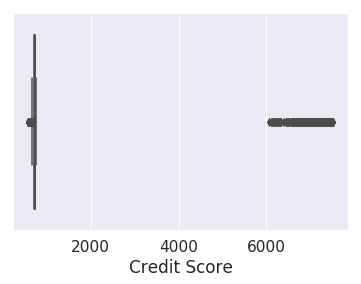

In [780]:
sns.boxplot(all_data['Credit Score'])

### Обработка категориальных переменных

In [781]:
for col in all_data.columns:
    if all_data[col].dtype == object:
        print(col)

Home Ownership
Purpose
Term
Years in current job


In [782]:
def make_dummy(data, feature):
    df = pd.get_dummies(data,prefix=None,columns=[feature], drop_first=True)
    for dummy_feature in df:
        data[dummy_feature] = df[dummy_feature]
    data.drop(columns=[feature], inplace=True) 

In [783]:
make_dummy(train, 'Home Ownership')
make_dummy(test, 'Home Ownership')

make_dummy(train, 'Purpose')
make_dummy(test, 'Purpose')

make_dummy(train, 'Term')
make_dummy(test, 'Term')

make_dummy(train, 'Years in current job')
make_dummy(test, 'Years in current job')

In [784]:
all_data = train.append(test)

### Отбор признаков

In [785]:
TARGET_NAME = "Credit Default"
BASE_FEATURE_NAMES = all_data.columns.drop(TARGET_NAME).tolist()

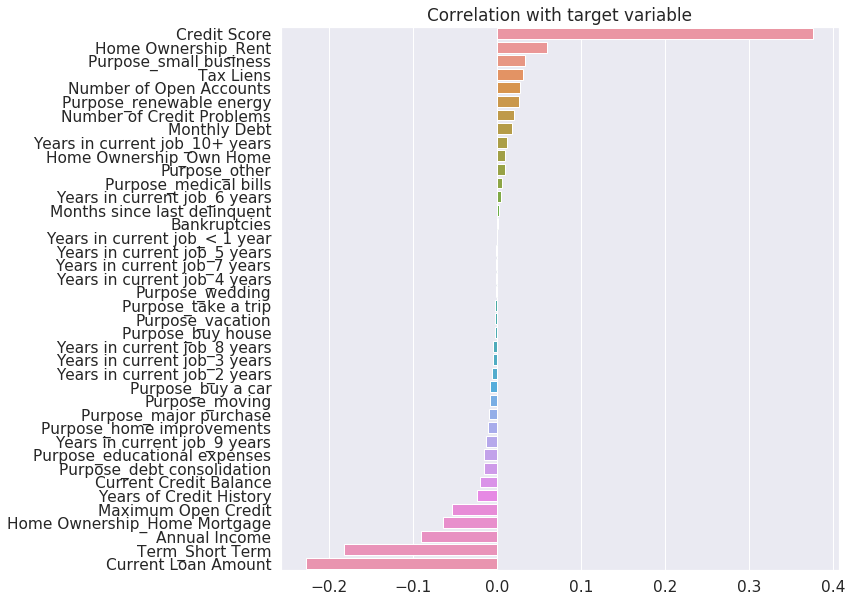

In [786]:
corr_with_target = train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 10))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [787]:
train.columns

Index(['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_buy a car', 'Purpose_buy house',
       'Purpose_debt consolidation', 'Purpose_educational expenses',
       'Purpose_home improvements', 'Purpose_major purchase',
       'Purpose_medical bills', 'Purpose_moving', 'Purpose_other',
       'Purpose_renewable energy', 'Purpose_small business',
       'Purpose_take a trip', 'Purpose_vacation', 'Purpose_wedding',
       'Term_Short Term', 'Years in current job_10+ years',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Years in current job_4 years', 'Years in current job_5 years',
       'Years 

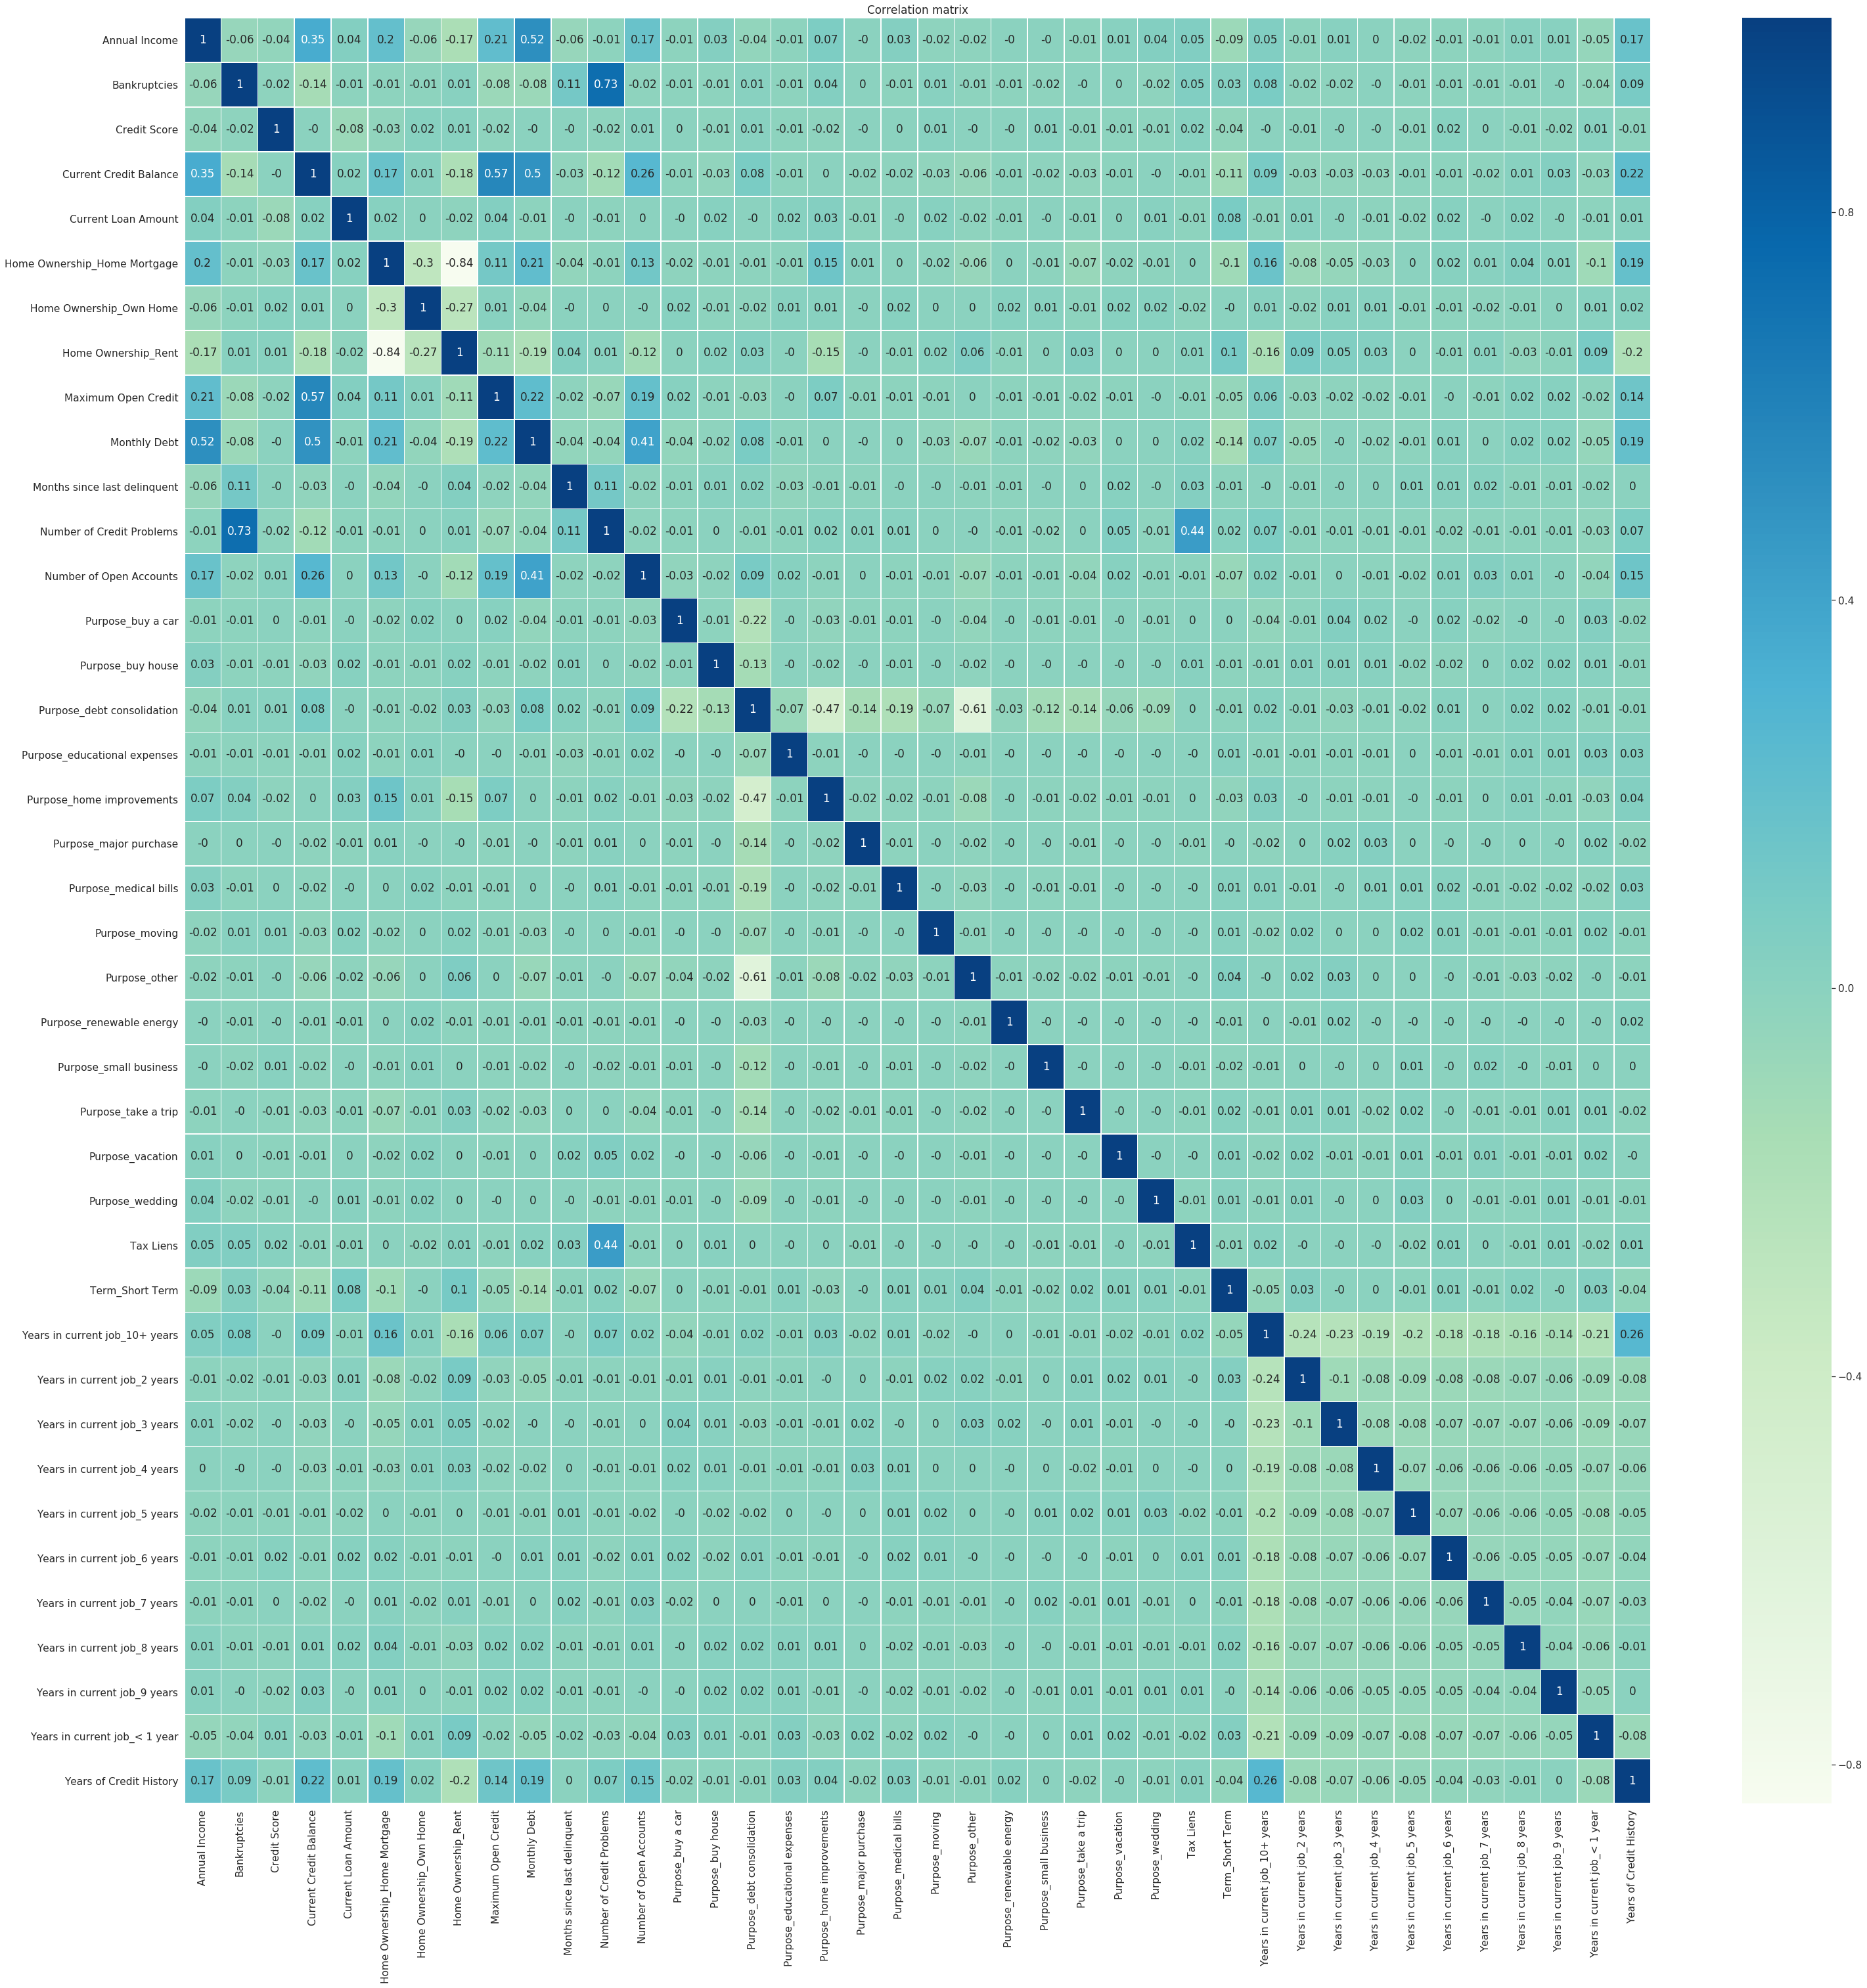

In [788]:
plt.figure(figsize = (50,50))

sns.set(font_scale=1.4)
sns.heatmap(train[BASE_FEATURE_NAMES].corr().round(2), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [789]:
SELECTED_FEATURE_NAMES = [
    'Credit Score',
    'Home Ownership_Rent',
    'Purpose_small business',
    'Tax Liens',
    'Number of Open Accounts',
    'Number of Credit Problems',
    'Monthly Debt',
    'Years in current job_10+ years',
    'Home Ownership_Own Home',
    'Current Credit Balance',
    'Years of Credit History',
    'Maximum Open Credit',
    'Home Ownership_Home Mortgage',
    'Annual Income',
    'Term_Short Term',
    'Current Loan Amount'
]

### Нормализация

In [790]:
NUM_FEATURE_NAMES = [
    'Annual Income',
    'Tax Liens',
    'Number of Open Accounts',
    'Years of Credit History',
    'Maximum Open Credit',
    'Number of Credit Problems',
    'Months since last delinquent',
    'Bankruptcies',
    'Current Loan Amount',
    'Current Credit Balance',
    'Monthly Debt',
    'Credit Score'
]


In [791]:
scaler = StandardScaler()

df_norm = train.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])
train[NUM_FEATURE_NAMES] = df_norm[NUM_FEATURE_NAMES].copy()

df_norm = test.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])
test = df_norm.copy()

### Балансировка

In [792]:
def balance_df_by_target(df, target_name):
    target_counts = df[target_name].value_counts()
    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()
    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1
    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1)

In [793]:
y = train[TARGET_NAME]
X = train.drop(columns=[TARGET_NAME])[SELECTED_FEATURE_NAMES]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [794]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
X_train = df_balanced.drop(columns=[TARGET_NAME])
y_train = df_balanced[TARGET_NAME]

### Подбор модели

In [795]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred, digits=4))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [796]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      4328
           1       0.79      0.72      0.75      3344

    accuracy                           0.79      7672
   macro avg       0.79      0.78      0.79      7672
weighted avg       0.79      0.79      0.79      7672

TEST

              precision    recall  f1-score   support

           0     0.7779    0.7441    0.7606      1059
           1     0.4435    0.4898    0.4655       441

    accuracy                         0.6693      1500
   macro avg     0.6107    0.6169    0.6131      1500
weighted avg     0.6796    0.6693    0.6739      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               788  271
1               225  216


In [797]:
clf = RandomForestClassifier(max_depth=7, n_estimators=100, random_state=11)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.70      0.90      0.79      4328
           1       0.80      0.51      0.62      3344

    accuracy                           0.73      7672
   macro avg       0.75      0.71      0.71      7672
weighted avg       0.75      0.73      0.72      7672

TEST

              precision    recall  f1-score   support

           0     0.7944    0.8867    0.8380      1059
           1     0.6226    0.4490    0.5217       441

    accuracy                         0.7580      1500
   macro avg     0.7085    0.6678    0.6799      1500
weighted avg     0.7439    0.7580    0.7450      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               939  120
1               243  198


In [798]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4328
           1       0.94      0.87      0.90      3344

    accuracy                           0.92      7672
   macro avg       0.92      0.91      0.92      7672
weighted avg       0.92      0.92      0.92      7672

TEST

              precision    recall  f1-score   support

           0     0.7961    0.8442    0.8194      1059
           1     0.5623    0.4807    0.5183       441

    accuracy                         0.7373      1500
   macro avg     0.6792    0.6625    0.6689      1500
weighted avg     0.7274    0.7373    0.7309      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               894  165
1               229  212


In [799]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4328
           1       0.93      0.83      0.87      3344

    accuracy                           0.90      7672
   macro avg       0.90      0.89      0.89      7672
weighted avg       0.90      0.90      0.89      7672

TEST

              precision    recall  f1-score   support

           0     0.7968    0.8366    0.8162      1059
           1     0.5541    0.4875    0.5187       441

    accuracy                         0.7340      1500
   macro avg     0.6754    0.6621    0.6675      1500
weighted avg     0.7254    0.7340    0.7287      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               886  173
1               226  215


### Подбор гипперпараметров

In [800]:
%%time
params = {'n_estimators': [100, 200, 500, 600],
          'max_depth': [1, 2, 3, 4, 5, 6, 7]}
cv=KFold(n_splits=4, random_state=21, shuffle=True)


forest = RandomForestClassifier(max_depth=7, n_estimators = 600, random_state=11)
rs = RandomizedSearchCV(forest, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X_train, y_train)

CPU times: user 1min 12s, sys: 0 ns, total: 1min 12s
Wall time: 1min 12s


In [801]:
clf = RandomForestClassifier(max_depth=rs.best_params_['max_depth'], n_estimators = rs.best_params_['n_estimators'], random_state=11)

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred) 

TRAIN

              precision    recall  f1-score   support

           0       0.71      0.90      0.79      4328
           1       0.80      0.52      0.63      3344

    accuracy                           0.73      7672
   macro avg       0.75      0.71      0.71      7672
weighted avg       0.75      0.73      0.72      7672

TEST

              precision    recall  f1-score   support

           0     0.7956    0.8820    0.8365      1059
           1     0.6166    0.4558    0.5241       441

    accuracy                         0.7567      1500
   macro avg     0.7061    0.6689    0.6803      1500
weighted avg     0.7429    0.7567    0.7447      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               934  125
1               240  201


### Финальное обучение и предсказание на тестовой выборке

In [802]:
df_for_balancing = pd.concat([X, y], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
X_train = df_balanced.drop(columns=[TARGET_NAME])
y_train = df_balanced[TARGET_NAME]

In [803]:
clf = RandomForestClassifier(max_depth=rs.best_params_['max_depth'], n_estimators = rs.best_params_['n_estimators'], random_state=11)
clf.fit(X_train, y_train)
y_pred = clf.predict(test[SELECTED_FEATURE_NAMES])

In [804]:
result = pd.DataFrame(test.reset_index())
result['Credit Default'] = y_pred
result['Id'] = result['index']

### Сохранение

In [805]:
result[['Id','Credit Default']].to_csv('babkin.a_predictions.csv', index=False)